In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.metrics import accuracy_score
import seaborn as sns

In [39]:
df = pd.read_csv("heart.csv")

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [41]:
print("Columns:", df.columns)
df.head()

Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [42]:
target_col = 'chol' if 'chol' in df.columns else df.columns[-1]  # fallback to last column

X = df.drop(target_col, axis=1)
y = df[target_col]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [45]:
plt.figure(figsize=(20,10))


<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [46]:
class_names = [str(cls) for cls in np.unique(y_train)]

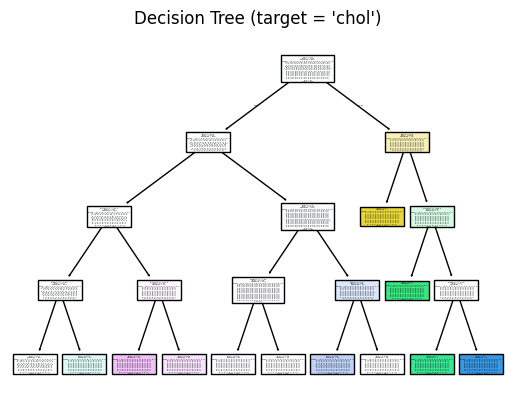

In [47]:
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True)
plt.title(f"Decision Tree (target = '{target_col}')")
plt.show()

In [48]:
target_col = 'age' if 'age' in df.columns else df.columns[-1]
X = df.drop(target_col, axis=1)
y = df[target_col]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:

train_accuracies = []
test_accuracies = []
depth_range = range(1, 21)

for depth in depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

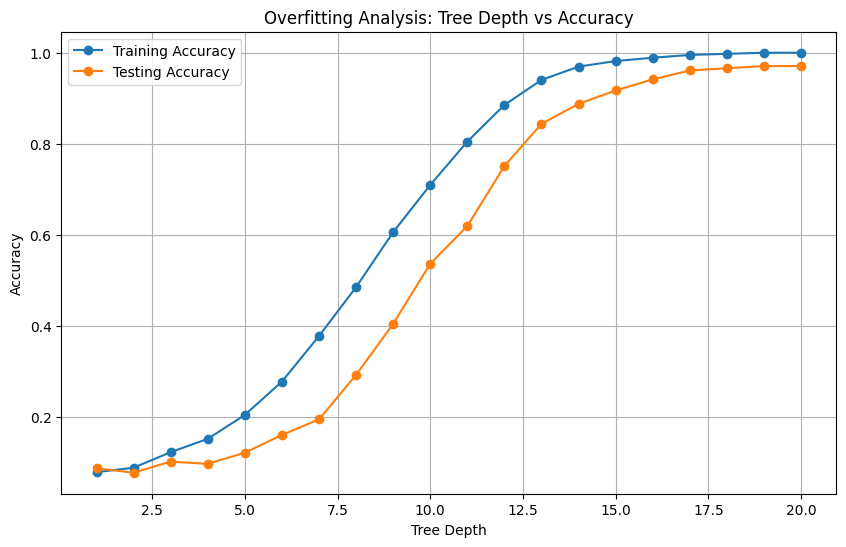

In [51]:
plt.figure(figsize=(10,6))
plt.plot(depth_range, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(depth_range, test_accuracies, label="Testing Accuracy", marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis: Tree Depth vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
target_col = 'trestbps' if 'trestbps' in df.columns else df.columns[-1]
X = df.drop(target_col, axis=1)
y = df[target_col]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

In [55]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

In [56]:
print("Decision Tree Accuracy:", round(dt_acc, 4))
print("Random Forest Accuracy:", round(rf_acc, 4))

Decision Tree Accuracy: 0.1902
Random Forest Accuracy: 0.3317


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

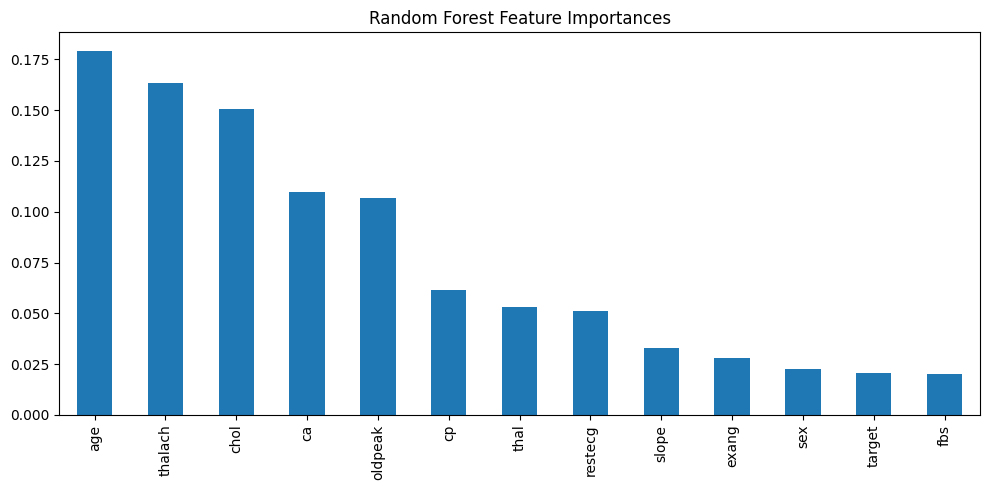

In [58]:
feature_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

In [66]:
target_col = 'ca' if 'ca' in df.columns else df.columns[-1]
X = df.drop(target_col, axis=1)
y = df[target_col]

In [67]:
dt_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)

In [68]:
dt_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')


In [69]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# For Decision Tree
dt_scores = cross_val_score(dt_clf, X, y, cv=skf, scoring='accuracy')
print("Decision Tree Mean CV Accuracy:", round(dt_scores.mean(), 4))

# For Random Forest
rf_scores = cross_val_score(rf_clf, X, y, cv=skf, scoring='accuracy')
print("Random Forest Mean CV Accuracy:", round(rf_scores.mean(), 4))


Decision Tree Mean CV Accuracy: 0.6302
Random Forest Mean CV Accuracy: 0.6946


In [70]:
print("Target class distribution:\n", y.value_counts())


Target class distribution:
 ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64


In [71]:
print("Columns:\n", df.columns)


Columns:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [72]:
print("Decision Tree CV Accuracy: ", np.round(dt_scores, 4))
print("Decision Tree Mean CV Accuracy: ", round(dt_scores.mean(), 4))

print("\nRandom Forest CV Accuracy: ", np.round(rf_scores, 4))
print("Random Forest Mean CV Accuracy: ", round(rf_scores.mean(), 4))

Decision Tree CV Accuracy:  [0.655  0.6228 0.6129]
Decision Tree Mean CV Accuracy:  0.6302

Random Forest CV Accuracy:  [0.6842 0.7047 0.695 ]
Random Forest Mean CV Accuracy:  0.6946
